# Linear regression and correlation 

The following dataset is a data frame with 7 economical variables, observed yearly from 1947 to 1962 (n=16).

- GNP.deflator: GNP implicit price deflator (1954=100)
- GNP: Gross National Product.
- Unemployed: number of unemployed.
- Armed Forces: number of people in the armed forces.
- Population: ‘noninstitutionalized’ population ≥ 14 years of age.
- Year: the year (time).
- Employed: number of people employed.

Source
J. W. Longley (1967) An appraisal of least-squares programs from the point of view of the user. Journal of the American Statistical Association 62, 819–841.

### TASKS: 
- Looking at the figures, which variables exhibit a positive correlation index?
- Chose one set of variables that are linearly correlated and construct a linear regression model to fit them.  
- Choose a next value in the future and predict the corresponding value of your model.

(The topics related to this example can be found in: Example 5.4.3 and Chapter 4.6 from Meyer, "Matrix Analysis and Applied Linear Algebra").

In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
import numpy as np
from scipy.linalg import qr,solve_triangular
from scipy.linalg import svd
import time


# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values



head = ['GNP.deflator', 'GNP', 'Unemployed', 'Armed Forces', 'Population', 'Year', 'Employed']
A = np.asarray(dataframe.to_numpy())

def angle(x,y): 
    z_x = (x - np.mean(x))/np.std(x)
    z_y = (y - np.mean(y))/np.std(y)
    rho = 0.
    if (len(x) == len(y)): 
        rho =  np.inner(z_x, z_y)/len(x)

    return rho



def scores_(dataframe): 
    (m,n) = dataframe.shape
    scores = {}
    for i in range(n): 
        for j in range(i+1,n): 
            header = head[i] + "/" + head[j]
            x,y = data[:,i], data[:,j]
            scores[header] = angle(x,y)
    return scores



#Let's compute all the scores in order to know what are the best correlated variables among the data

scores = scores_(dataframe)


keys = list(scores.keys())
values = list(scores.values())

print("BELOW THE LIST OF CORRELATED VARIABLES:\n\n")
for i in range(len(keys)): 
    if(abs(values[i]) >= 0.8):
        print("\t - Score for {0} : {1}\n".format(keys[i], values[i]))


print("\n\nHEADER FOR VARIABLES:\n")
print(head)



BELOW THE LIST OF CORRELATED VARIABLES:


	 - Score for GNP.deflator/GNP : 0.9915891780247819

	 - Score for GNP.deflator/Population : 0.979163432977498

	 - Score for GNP.deflator/Year : 0.991149190067205

	 - Score for GNP.deflator/Employed : 0.9708985250610559

	 - Score for GNP/Population : 0.9910900694584774

	 - Score for GNP/Year : 0.9952734837647845

	 - Score for GNP/Employed : 0.9835516111796693

	 - Score for Population/Year : 0.9939528462329255

	 - Score for Population/Employed : 0.9603905715943756

	 - Score for Year/Employed : 0.9713294591921189



HEADER FOR VARIABLES:

['GNP.deflator', 'GNP', 'Unemployed', 'Armed Forces', 'Population', 'Year', 'Employed']


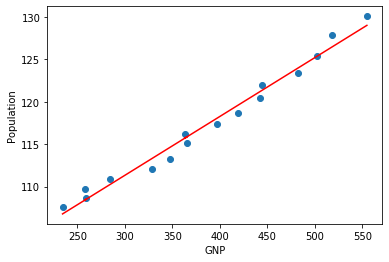

Predicted value for Population with GNP = 750.600: 142.6


In [2]:
# GNP,Year
ix,iy = 1, -3
x, y = data[:, ix], data[:, iy]



A = np.ones([16,2])
A[:,1] = x





#Solve with the normal equation
sol = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,y))


plt.figure(2)
plt.scatter(x, y)

plt.xlabel(head[ix])
plt.ylabel(head[iy])


#Solve with the QR factorization 
Q,R = qr(A)
m,n = R.shape


rank = int(np.count_nonzero(np.diag(R)))
sol = np.linalg.solve(R[:rank,:rank],np.dot(Q.T,y)[:rank])


plt.plot(x,  sol[1]*x + sol[0], '-r')
plt.show()

#predict
print('Predicted value for Population with GNP = 750.600:',np.round(sol[1]*750.600 + sol[0],2))

# Eigenfaces

- Check and compare all the studied techniques to find the minimal value of $k$, number of principal components that are useful to classify the faces.

- Classify all the faces in the testset and compute the confusion matrix . The element in position $i,j$ of the confusion matrix contains the number of observations known to be in group $i$ and predicted to be in group $j$. Use  sklearn.metrics.confusion_matrix and compute also the classification report using sklearn.metrics.classification_report.

(The topics related to this exercise can be found in: eigenfaceforrecognition-TurkPentland-jcn1991.pdf Chapter 6 from Elden, "Numerical Linear Algebra and Applications in Data Mining")

['.DS_Store', 'Untitled.ipynb', 'arcDataset', 'olivetti_faces_target.npy', 'olivetti_faces.npy', '.ipynb_checkpoints', 'EXAM_LORUSSO.ipynb', 'EXAM_LORUSSO.pdf']
[[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.764462

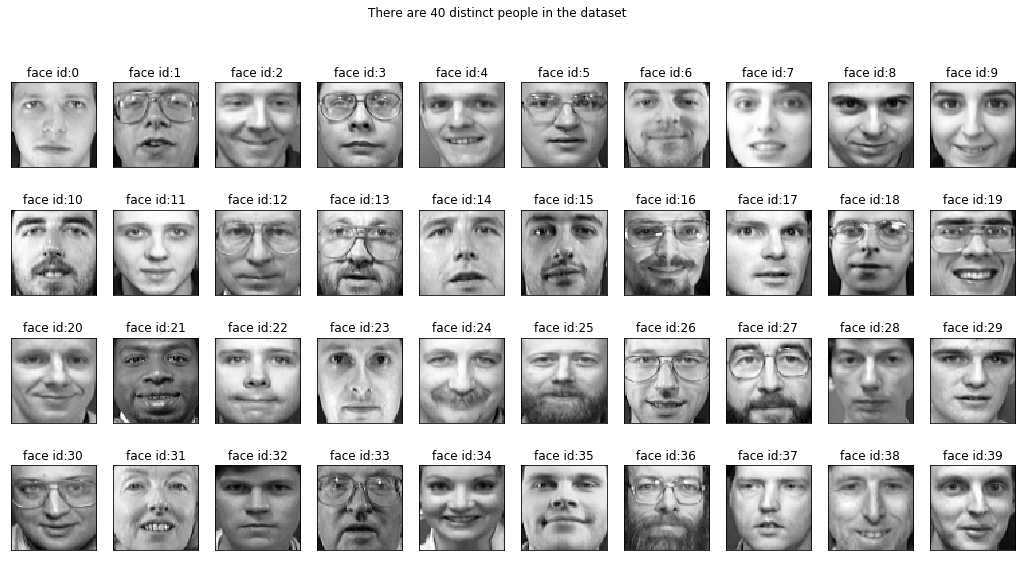

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from scipy.linalg import svd
import matplotlib.pyplot as plt
import os 


print(os.listdir("./"))
##### LOAD THE DATA
data=np.load("./olivetti_faces.npy")
target=np.load("./olivetti_faces_target.npy")

print(data)
print(target)




def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")
    
    
show_40_distinct_people(data, np.unique(target))



In [4]:
def Classifier(T_set, Pca, Target,mean): 
    """
    ########## INPUT ##########
    
    T_set: training set useful to compute the different classes
    Pca : Pca of the training set
    Target: target of train set
    mean: mean of the train set
    
    ######### OUTPUT ##########
    
    Cli: Classes
    T_set: sorted training set
    Target: sorted target
    n_occ: number of images for each subject 
    n_class: number of classes
    
    """
    
    #Reorder train set and its target
    T_set = T_set[:,np.argsort(Target)]
    Target = Target[np.argsort(Target)]


    #number of individuals inside the train set
    n_class = len(np.unique(Target))
    
    #number of occurences for each individual
    n_occ = np.unique(Target, return_counts=True)[1]    
    
    
    Cli = {}
    for k in range(0,n_class): 
        Cli[k] = []
    
    for m in range(0,n_class): 
        
        step = n_occ[m]
        
        for j in range(m*step,(m*step + step)):
            
            #Coordinates of each of the train images onto the eigenspace
            P = np.dot( Pca.T, T_set[:,j] - mean)
            Cli[m].append(P)
            
        Cli[m] = np.asarray(Cli[m])
        
    return Cli, T_set, Target, n_occ, n_class
    

    
    

def imgQuery(Qimg, Mean, Pca, Clmeans, Ctol = None): 
    
    """ 
    ######### INPUT ###########
    
    Qimg: Query image in matrix form (2d)
    Mean: mean of the training set
    Pca : Components onto project the Qimg
    Clmeans: the means for each class
    
    Ctol: Optional, tolerance for the classification of the image
        
    ######## OUTPUT ##########
    
    Class: The classes, if any, to which the query image pertains
    Dist : Relative Distance from eigenspace 
    
    """
    
    Qimg = np.asarray(Qimg)
    
    Q = Qimg - Mean
    P = np.dot(Pca.T, Q)
    

    Cl_dist = np.zeros(len(Clmeans))
    Err_rel = np.zeros(len(Clmeans))
    
    for i in range(40):
        Cl_dist[i]= np.linalg.norm(Clmeans[i]-P,2)
        Err_rel[i] = Cl_dist[i]/np.linalg.norm(Clmeans[i],2)

            
    if Ctol is None: 
        
        Class = np.argmin(Cl_dist)

    else:  
        Class = [i for i in range(len(Cl_dist)) if Err_rel[i] <= Ctol]
        

    Dist = np.linalg.norm(Q - np.dot(Pca,P),2)/np.linalg.norm(Q,2)
    
    return Class, Dist



def correlation_index(A,B):
    
    """
    
    ############## INPUT ###########
    
    A,B : matrices 
    
    ############## OUTPUT #########
    
    angle : correlation index between A,B
    
    """
    
    angle = np.inner( ( (A.flat)-np.mean(A.flat) )/np.std(A.flat),(B.flat-np.mean(B.flat))/np.std(B.flat))
    angle = angle/np.prod(A.shape)
    return angle



def Select_comp(img, tol, Entropy = False, plot = False ): 
    
    """
    ############### INPUT ################
    
    img: The image for which we wish to find the number of principal components
    mean: the mean image
    tol: array of tolerances 
    Entropy: if true, enable entropy criterion
    plot: if true, enable plotting
    
    
    
    ############## OUTPUT ##############
    
    M: dictionary with the information concerning the number of principal components and correlation index 
      for each tolerance 
    """
    Entropy = Entropy
    
    (nb, na) = img.shape
    mm = np.mean(img,axis=0).reshape(1,na)
    
    
    Uimg,simg,Vimg = svd(img)
    imgMean = np.copy(img)
    imgMean -= mm
    U,s,Vh = svd(imgMean) 


    M = {}
    for i in range(len(tol)):
        M[i] = []
    
    i = 0 
    for ind in tol:
        if Entropy:   
            
            #scale the values in order to obtain a normal distribution of the total variance
            #This respects the property of the entropy
            f=s**2. / np.sum(s**2.) 
            r = simg.shape
            entropy = (-1/np.log(r))*np.sum(f*np.log(f))
            
            ks = int(r*entropy)
            perc=1-ind
            nc = int(r*entropy*perc) 
            
            Apimg=np.dot( U[:,0:nc]*s[0:nc],Vh[0:nc,:])  + mm
        else:
            
            #normalize the D vector
            f = (simg)/simg[0]
            
            #obtain the number of principal components as the total number of variances above the tolerance
            nc = np.sum(f >ind)
            Apimg=np.dot( Uimg[:,0:nc]*simg[0:nc],Vimg[0:nc,:]) +mm
         
        
        Apimg=np.dot( Uimg[:,0:nc]*simg[0:nc],Vimg[0:nc,:])+mm
        
        if(plot): 
            imgplot = plt.imshow(Apimg,cmap=plt.get_cmap("gray"))
            plt.show()
        
        
        corr_ind = correlation_index(img ,Apimg)  
        M[i].append({"N comp":nc,"Tol": ind,"Corr":corr_ind})
        i = i+1
        print('Number of suggested components:',nc,' Tol = ', ind,' Correlation index = ', corr_ind)
        
        
    return M
    

In [5]:


# Compute a matrix containing all the train set images as his columns

# Compute the training set and the test set (already sorted) 

Xt = []
Timg =[]

step = 6



for ind in range(0,40):
    for j in range(0,step):
        Xt.append(np.asarray(data[ind*10 + j]))
    for j in range(step,10):
        Timg.append(np.asarray(data[ind*10 + j]))
        
    
    
Xt = np.asarray(Xt)
(nt,nr,nc)=Xt.shape

Timg = np.asarray(Timg)
(nf,nr,nc)=Timg.shape


Xt = Xt.reshape(nt,nr*nc).T
Timg = Timg.reshape(nf,nr*nc).T



####################

print(data.shape)
# Train and test set splitted randomly
X = data.reshape(data.shape[0],data.shape[1]*data.shape[2])
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)

X_train = X_train.T
X_test = X_test.T

#Reorder test set (train set reordering is made inside Classifier function)
X_test = X_test[:,np.argsort(y_test)]
y_test = y_test[np.argsort(y_test)]




######################
        


# Compute a matrix containing all the train set images as his columns
imgTR = X_train
imgTT = X_test

(nrc,nt)=imgTR.shape


e = np.ones((1,nt))
mm = np.mean(imgTR,axis=1)

#compute the centered set of images by subtracting the mean
imgTR_c = imgTR - np.dot(mm.reshape(nrc,1),e)




(400, 64, 64)


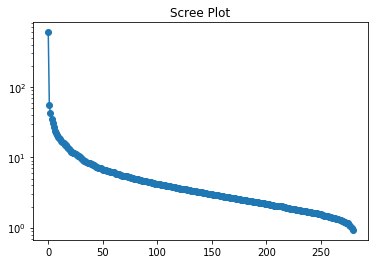

In [6]:
#Cattell's Scree plot: use the number of components where is located the 'elbow'
U,simg,V = svd(imgTR[:,:])

plt.semilogy(simg,'-o') 
plt.title("Scree Plot")

plt.show()



Looking at the scree plot we can choose a number of components in the range [100,150]

In [7]:
#Scree plot: the number of useful components is given on the elbow 
tol=[1e-2]

print("\nUsing distance criterion:\n")
M = Select_comp(imgTR[:,:],  tol, Entropy = False, plot = False)

print('\n\n========================================\n\n')
print("Using entropy criterion:\n")
M = Select_comp(imgTR[:,:],  tol, Entropy = True, plot = False)



Using distance criterion:

Number of suggested components: 61  Tol =  0.01  Correlation index =  0.9246498107910156




Using entropy criterion:

Number of suggested components: 139  Tol =  0.01  Correlation index =  0.947212655203683


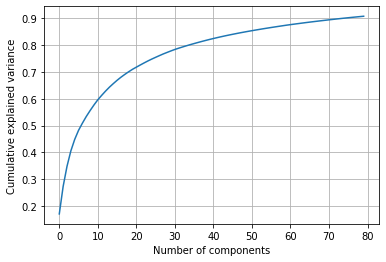

In [8]:
#dimensions for plotting images
nr,nc = 64,64

whiten=True


ncomp=80
q = 10



pca = PCA(copy=True,n_components=ncomp,whiten=True).fit(imgTR_c)
IM_pca = pca.transform(imgTR_c)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

Cli ,Tr_set, Target, n_occ, n_class = Classifier(imgTR, IM_pca, y_train,mm)


Cl_means = {}
for i in range(0,n_class):
    Cl_means[i]=np.mean(Cli[i],axis=0) 





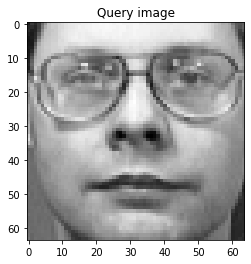

In [9]:
plt.title("Query image")
plt.imshow(imgTT[:,q].reshape(nr,nc),cmap='gray')


Recontructed image from eigenfaces
(80, 4096)


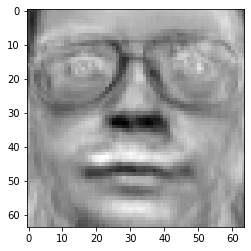

In [10]:
print("Recontructed image from eigenfaces")
P = np.dot(IM_pca.T, imgTT[:,q] -mm)

print(IM_pca.T.shape)

CC = np.dot(IM_pca, P ) +mm
plt.imshow(CC.reshape(nr,nc),cmap='gray')
plt.show()



The class of the subject corresponding to the image query is: { 3 }



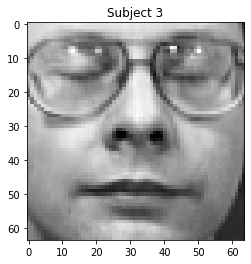

In [11]:
C,D = imgQuery(imgTT[:,q], mm, IM_pca, Cl_means)

print('\n\nThe class of the subject corresponding to the image query is: {', C,'}\n')

# Tr_set is the sorted training set 
plt.imshow(Tr_set[:,C*n_occ[C]].reshape(nr,nc),cmap='gray')
plt.title("Subject " + str(C))
plt.show()
print('\n\n')





Classes of subjects matched with the query with tolerance:  1.2 

 [1, 3, 35]


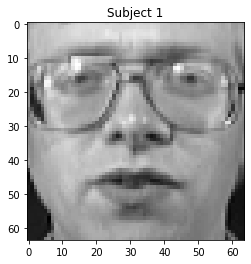

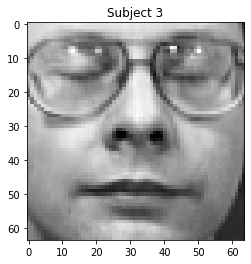

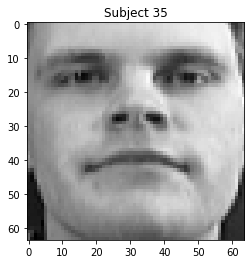

In [12]:
Ctol = 1.2
C,D = imgQuery(imgTT[:,q], mm, IM_pca, Cl_means,Ctol)

print('\n\nClasses of subjects matched with the query with tolerance: ', Ctol, '\n\n',C)


for i in range(len(C)): 
    plt.imshow(Tr_set[:, C[i]*n_occ[i] ].reshape(nr,nc) ,cmap='gray')
    plt.title("Subject " + str(C[i]))
    plt.show()
    
print('\n\n')



Subjects not predicted:  set()


Classification report of the Confusion matrix:

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         3
           4       0.67      0.67      0.67         3
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         

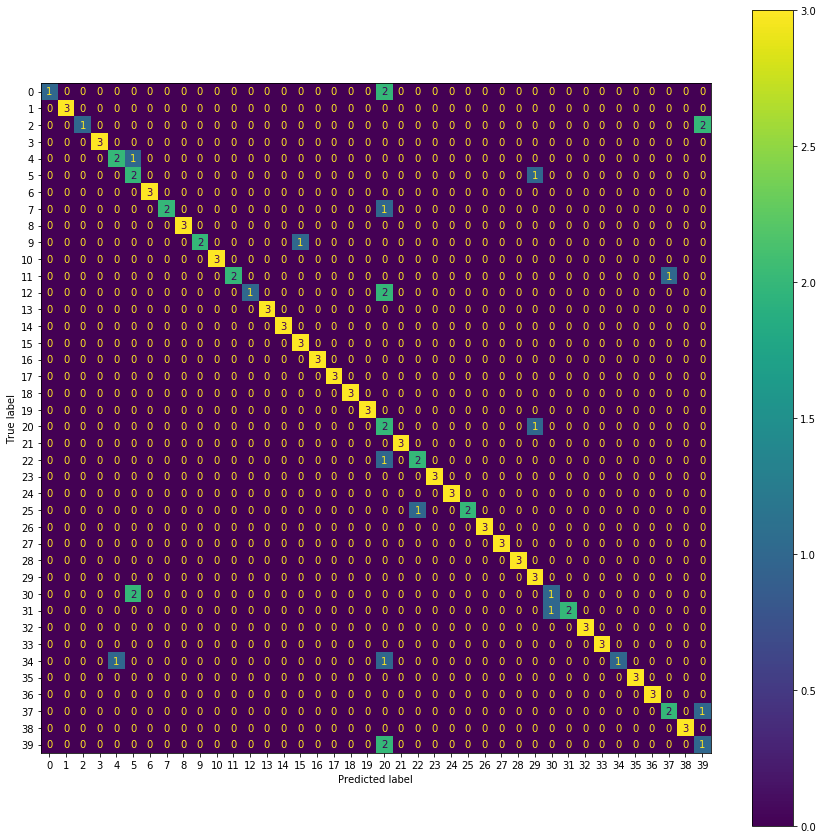

In [13]:
Predicted = np.zeros(imgTT.shape[1])


for i in range(imgTT.shape[1]): 
    C,D = imgQuery(imgTT[:,i], mm, IM_pca, Cl_means)
    Predicted[i] = C



Co = confusion_matrix(y_test,Predicted,labels=range(40))


cm = confusion_matrix(np.arange(40), np.arange(40))

cmp = ConfusionMatrixDisplay(Co, display_labels=np.arange(40))

fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)

print('\n\nSubjects not predicted: ', set(y_test) - set(Predicted))

print('\n\nClassification report of the Confusion matrix:\n')

print(classification_report(y_test,Predicted, zero_division=0))




# Image compression

- How would you "compress" each image in the previous dataset by using any of the studied factorizations?
- Choose one image and plot the compressed one and determine the best $k$ orthogonal bases for its range. The "best $k$" is computed such that the approximated image will have a relative distance in 2-norm from the orignal image less than $10^{-2}$.
Plot the approximated image.

- Use $k$ principal directions for the range of all the images to repeat the classification task by using these directions rather than the whole images.


In order to accomplish these tasks, the SVD and QR factorization have been used. 
    


###### COMPRESSION WITH SVD ######



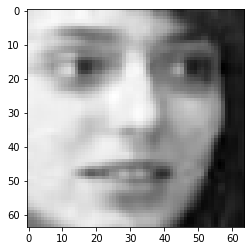

Number of components: 10
Distance between Approximated image and original one: 0.015586379564543814 
Singular values corresponding to k rank approximation:0.015586385503411293


###### COMPRESSION WITH QR #######

Distance between Approximated image and original one: 0.009548925446378264
 
Number of components: 16


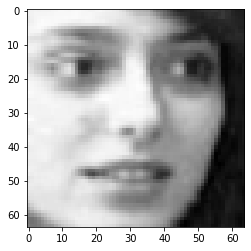

In [14]:
from scipy.linalg import svd
from scipy.linalg import qr



def SVD_compression(ImgIn,tol = 1e-2,plot = False): 
    """
    ###############INPUT ###############
    
    ImgIn: Input image
    tol: relative distance to satisfy in order to accept the truncated SVD
    plot: decide whenever to plot the resulting image
    
    ################OUTPUT ###########
    
    
    ImgOut: image approximated at rank k 
    Err: error committed in the approximation 
    k: rank of the approximation
    
    """
    
    A = np.copy(ImgIn)
    U,D,V = svd(A)
 

    Dc = D/D[0] # Divide by the greatest eigenvalues in order to misure the relative distance
    
    #Low rank approximation: The distance between the approximated image and the original one is given by the k+1 value
    Acc = [i for i in range(len(Dc)) if Dc[i] < tol]
    
    ImgOut = np.zeros(np.outer(U[:,0], V[0,:]).shape)
    

    Err = np.zeros(len(Acc))
    

    j = 0 
    
    #Modify k will show more images 
    for k in Acc[:1]: 
        ImgOut[:,:] = 0.
 
        for i in range(0,k): 

            ImgOut = ImgOut + D[i]*np.outer(U[:,i], V[i,:])
            
        Err[j] = np.linalg.norm(A-ImgOut,2)/D[0]

            
        if(plot): 
            print("\n###### COMPRESSION WITH SVD ######\n")
            plt.imshow(ImgOut,cmap='gray')
            plt.show()
            print("Number of components: {0}".format(k))
            print("Distance between Approximated image and original one: {0} ".format(Err[j]))
            print("Singular values corresponding to k rank approximation:{0}\n".format(Dc[k]))
            
        j = j+1


    return ImgOut,Err[0],k


def QR_compression(ImgIn,tol = 1e-2,plot = False): 
    """
    ############### INPUT ###############
    
    ImgIn: Input image
    tol: relative distance to satisfy in order to accept the truncated SVD
    plot: decide whenever to plot the resulting image
    
    
    
    ################ OUTPUT ###########
    
    ImgOut: image approximated at rank k 
    Err: error committed in the approximation 
    nc: rank of the approximation
    
    
    
    """
    A = np.copy(ImgIn)
    Q,R,P = qr(A,pivoting=True)
    
    
    nc= 0
    ImgOut = np.zeros(np.dot(Q[:,:nc],R[:nc,:]).shape)
    ImgOut[:,P] = np.dot(Q[:,:nc],R[:nc,:])
    
    Err = np.linalg.norm(A-ImgOut,2)/np.linalg.norm(A,2)
    
    while( Err > 1e-2): 
        nc = nc + 1
        ImgOut[:,P] = np.dot(Q[:,:nc],R[:nc,:])
        Err = np.linalg.norm(A-ImgOut,2)/np.linalg.norm(A,2)

    
    if(plot): 
        print("\n###### COMPRESSION WITH QR #######\n")
        print("Distance between Approximated image and original one: {0}\n ".format(Err))
        print("Number of components: {0}".format(nc))
        plt.imshow(ImgOut,cmap='gray')
        plt.show()
       


    
    
    return ImgOut,Err,nc


query = 73
Img_proxSVD,Err_SVD,nc_svd = SVD_compression(data[query],tol=1e-2*1.6,plot=True)
Img_proxQR, Err_QR,nc_qr= QR_compression(data[query],tol=1e-2,plot=True)








# Classification with $k$ principal components of the images


   
## Observations: 
   
Once obtained the SVD of every image ($A=UDV^T$) of both the train set and test set, 
we obtain the following results:
   
- When using only $k$ columns of $U$  instead of the whole images, the classification fails

- If we use $k$ columns of $U$ multiplied by the corresponding singular value, we obtain an acceptable     classification for the images in the test set
  even with a small $k$ ( i.e. $k=5$ )
       
We can assume that the singular values are the keys for a good classification task



In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [16]:
## This version of the classifier  is made for the manipulation of the new train set 
## obtained by using k columns of the U's


def Classifier(T_set,VT_set, Pca, Target,mean): 
    """
    ########## INPUT ##########
    
    T_set: training set useful to compute the different classes
    Pca : Pca of the training set
    Target: target of train set
    mean: mean of the train set
    
    ######### OUTPUT ##########
    
    Cli: Classes
    T_set: sorted training set
    VT_set: sorted V's of SVD
    Target: sorted target
    n_occ: number of images for each subject 
    n_class: number of classes
    
    """
    
    #Reorder train set and its target
    T_set = T_set[:,np.argsort(Target)]
    VT_set = VT_set[:,np.argsort(Target)]
    Target = Target[np.argsort(Target)]


    #number of individuals inside the train set
    n_class = len(np.unique(Target))
    
    #number of occurences for each individual
    n_occ = np.unique(Target, return_counts=True)[1]    
    
    
    Cli = {}
    for k in range(0,n_class): 
        Cli[k] = []
    
    for m in range(0,n_class): 
        
        step = n_occ[m]
        
        for j in range(m*step,(m*step + step)):
            
            #Coordinates of each of the train images onto the eigenspace
            P = np.dot( Pca.T, T_set[:,j] - mean)
            Cli[m].append(P)
            
        Cli[m] = np.asarray(Cli[m])
        
    return Cli, T_set, VT_set,Target, n_occ, n_class
    

    
    

def imgQuery(Qimg, Mean, Pca, Clmeans, Ctol = None, Ftol = None): 
    
    """ 
    ######### INPUT ###########
    
    Qimg: Query image in matrix form (2d)
    Mean: mean of the training set
    Pca : Components onto project the Qimg
    Clmeans: the means for each class
    
    Ctol: Optional, tolerance for the classification of the image
    Ftol: Optional, tolerance for the face space 
        
    ######## OUTPUT ##########
    
    Class: The classes, if any, to which the query image pertains
    Dist : Distance from eigenspace 
    
    """
    
    Qimg = np.asarray(Qimg)
    
    Q = Qimg - Mean
    P = np.dot(Pca.T, Q)
    

    Cl_dist = np.zeros(40)
    
    for i in range(40):
        Cl_dist[i]= np.linalg.norm(Clmeans[i]-P)
        
        #inserire errore relativo per ogni classe così da poter utilizzare la tolleranza CLmeans -p /clmeans
        
    
    
    if Ctol is None: 
        
        Class = np.argmin(Cl_dist)

    else:  
        Class = [i for i in len(Cl_dist) if Cl_dist[i] <= Ctol]
    
    Dist = np.linalg.norm(Q - np.dot(Pca,P))
    
    return Class, Dist




In [17]:
data=np.load("./olivetti_faces.npy")
target=np.load("./olivetti_faces_target.npy")



# Train and test set splitted randomly
X = data.reshape(data.shape[0],data.shape[1]*data.shape[2])

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, stratify=target, random_state=0)

X_train = X_train.T
X_test = X_test.T

#Reorder test set (train set reordering is made inside Classifier function)
X_test = X_test[:,np.argsort(y_test)]
y_test = y_test[np.argsort(y_test)]


###############
     
    
Source_train = X_train[:,np.argsort(y_train)]
Source_target_train = y_train[np.argsort(y_train)]


#kk is the number of columns to retain from the U's of the SVD for each images
kk = 5
nr,nc = 64,kk


imgUTR = np.zeros((nr*nc,X_train.shape[1]))
imgSTR = np.zeros((nc,X_train.shape[1]))
imgVTR = np.zeros((nr*nc,X_train.shape[1]))


imgUTT = np.zeros((nr*nc,X_test.shape[1]))
imgSTT = np.zeros((nc,X_test.shape[1]))
imgVTT = np.zeros((nr*nc,X_test.shape[1]))




for i in range(X_train.shape[1]): 
    U,s,V = svd(X_train[:,i].reshape(64,64))
    
    imgUTR[:,i] = (U*s)[:,:kk].reshape(64*kk)
    imgSTR[:,i] = s[:kk]
    
    # Transpose the V for later reconstruction
    # When we will reconstruct we'll need to transpose the V in order to conform the dimensions between U,V
    imgVTR[:,i] = V[:kk,:].T.reshape(64*kk)
    
for i in range(imgUTT.shape[1]): 
    U,s,V = svd(X_test[:,i].reshape(64,64))
    imgUTT[:,i] = (U*s)[:,:kk].reshape(64*kk)
    imgSTT[:,i] = s[:kk]
    
    # Transpose the V for later reconstruction
    # When we will reconstruct we'll need to transpose the V in order to conform the dimensions between U,V
    imgVTT[:,i] = V[:kk,:].T.reshape(64*kk)
    


##########################################################################################

# Compute a matrix containing all the train set images as his columns
imgTR = X_train
imgTT = X_test

(nrc,nt)=imgUTR.shape


e = np.ones((1,nt))
mm = np.mean(imgUTR,axis=1)

#compute the centered set of images by subtracting the mean
imgTR_c = imgUTR-np.dot(mm.reshape(nrc,1),e)





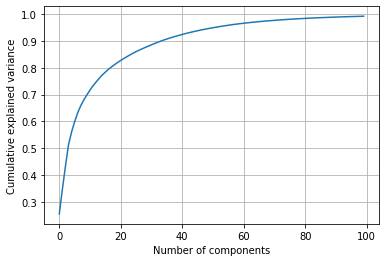

In [18]:
#dimensions for plotting images

whiten=True


ncomp=100

#nb: subject 10 on q = 20
q = 70


pca = PCA(copy=True,n_components=ncomp,whiten=True).fit(imgTR_c)
IM_pca = pca.transform(imgTR_c)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');


Cli ,UTr_set,VTr_set, Target, n_occ, n_class = Classifier(imgUTR, imgVTR,IM_pca, y_train,mm)


Cl_means = {}
for i in range(0,n_class):
    Cl_means[i]=np.mean(Cli[i],axis=0)  



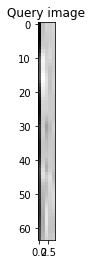

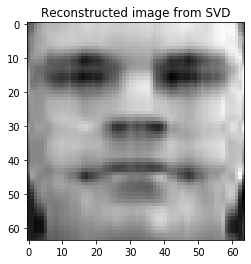

In [19]:
plt.title("Query image")
plt.imshow(imgUTT[:,q].reshape(nr,nc),cmap='gray')
plt.show()


plt.title("Reconstructed image from SVD")
plt.imshow(np.dot(imgUTT[:,q].reshape(nr,nc) ,imgVTT[:,q].reshape(nr,nc).T),cmap='gray')
plt.show()



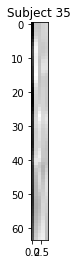



The class of the subject corresponding to the query image is: { 35 }



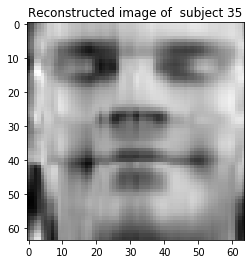

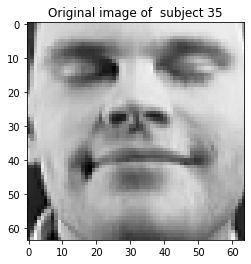

In [20]:
C,D = imgQuery(imgUTT[:,q], mm, IM_pca, Cl_means)

plt.imshow(UTr_set[:,C*n_occ[C]].reshape(nr,nc),cmap='gray')
plt.title("Subject " + str(C))
plt.show()

print('\n\nThe class of the subject corresponding to the query image is: {', C,'}\n')

# Note that the V is transposed in order to have the original values
plt.title("Reconstructed image of " + " subject " + str(C))
plt.imshow(np.dot(UTr_set[:,C*n_occ[C]].reshape(nr,nc), VTr_set[:,C*n_occ[C]].reshape(nr,nc).T),cmap='gray')
plt.show()

print('\n\n')
plt.title("Original image of " + " subject " + str(C))
plt.imshow(Source_train[:,C*n_occ[C]].reshape(64,64),cmap='gray')
plt.show()



Subjects not predicted:  {9, 2, 11, 5}


Classification report of the Confusion matrix:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         2
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         2
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       0.00      0.00      0.00 

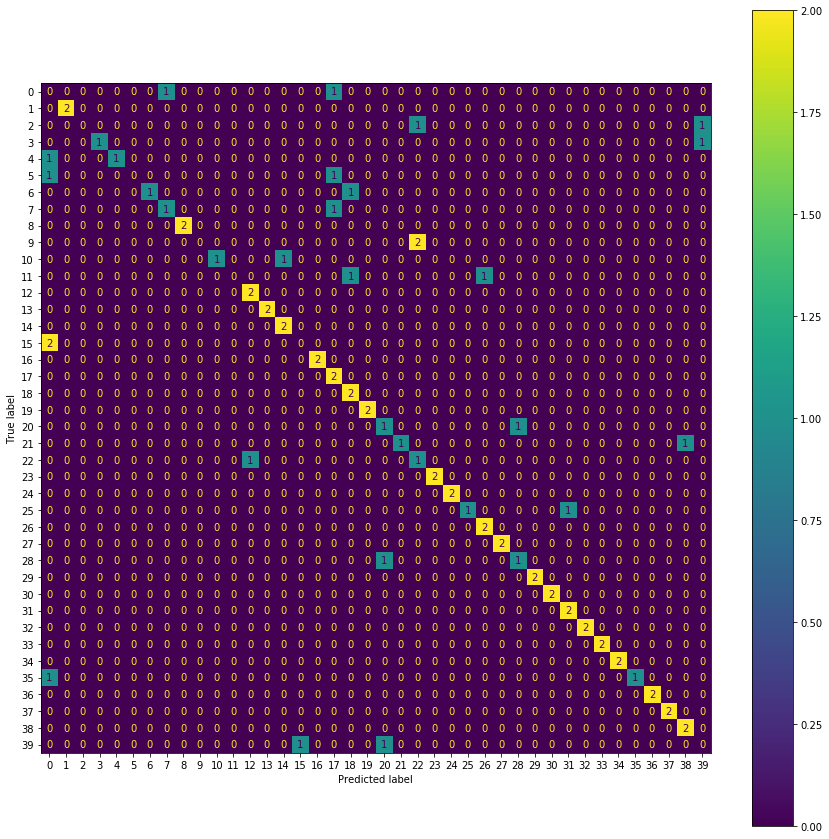

In [21]:

Predicted = np.zeros(imgUTT.shape[1])


for i in range(imgUTT.shape[1]): 
    C,D = imgQuery(imgUTT[:,i], mm, IM_pca, Cl_means)
    Predicted[i] = C


Co = confusion_matrix(y_test,Predicted,labels=range(40))

cm = confusion_matrix(np.arange(40), np.arange(40))
cmp = ConfusionMatrixDisplay(Co, display_labels=np.arange(40))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)


print('\n\nSubjects not predicted: ', set(y_test) - set(Predicted))

print('\n\nClassification report of the Confusion matrix:\n')
np.seterr(divide='ignore')
print(classification_report(y_test,Predicted, zero_division=0))